<a href="https://colab.research.google.com/github/JackHub5/201220043_UASDataMining_BreastCancer/blob/main/breast_cancer_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepare library dan load data set

In [208]:
#import library penting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline

In [209]:
#load dataset
data = pd.read_csv('Breast Cancer.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [211]:
#cek jumlah data dan kolomnya
data.shape

(569, 32)

## Step EDA

In [212]:
#cek data kosong
data.isnull().values.any()

False

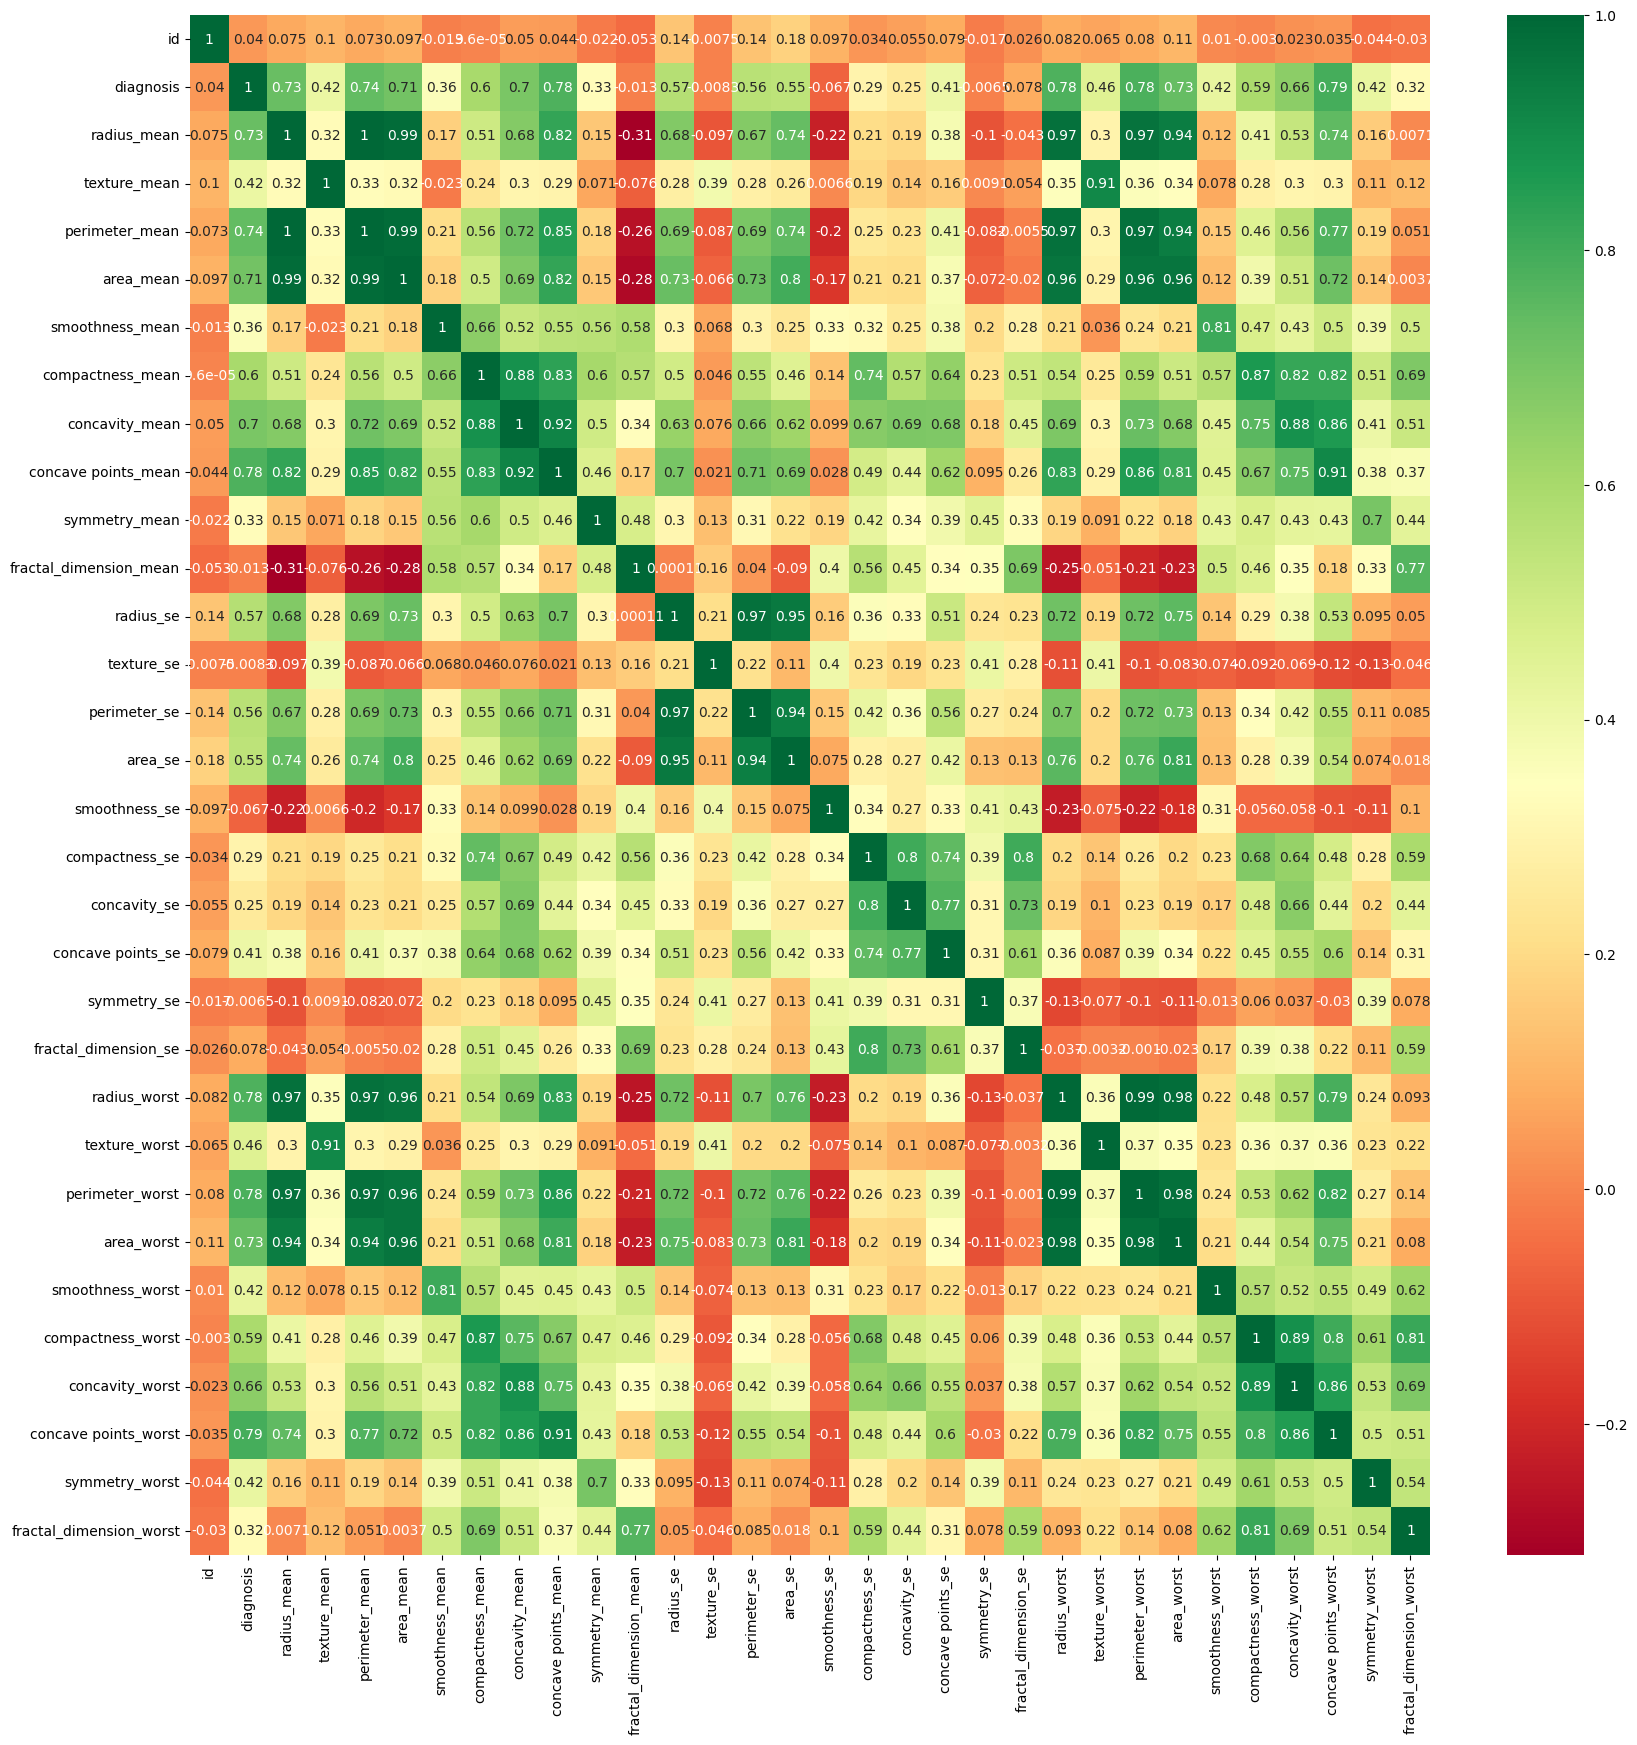

In [213]:
#Korelasi menggunakan heatmap

korelasi = data.corr()
features = korelasi.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[features].corr(),annot=True,cmap="RdYlGn")


In [214]:
#Show corellation in tables
data.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [215]:
#statistika dasar
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [216]:
#checking skewness dari data
cancer_true_count =len(data.loc[data['diagnosis']== 1])
cancer_false_count = len(data.loc[data['diagnosis']== 0])

In [217]:
#view
(cancer_true_count,cancer_false_count)

(212, 357)

In [218]:
#Missing value
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of columns : {0}'.format(data.shape[1]))

total number of rows : 569
total number of columns : 32


In [219]:
#searching missing value 0
for missing in data.columns:
  print('Banyak baris nilai nol untuk {0} : {1}'.format(missing, len(data.loc[data[missing]==0])))

Banyak baris nilai nol untuk id : 0
Banyak baris nilai nol untuk diagnosis : 357
Banyak baris nilai nol untuk radius_mean : 0
Banyak baris nilai nol untuk texture_mean : 0
Banyak baris nilai nol untuk perimeter_mean : 0
Banyak baris nilai nol untuk area_mean : 0
Banyak baris nilai nol untuk smoothness_mean : 0
Banyak baris nilai nol untuk compactness_mean : 0
Banyak baris nilai nol untuk concavity_mean : 13
Banyak baris nilai nol untuk concave points_mean : 13
Banyak baris nilai nol untuk symmetry_mean : 0
Banyak baris nilai nol untuk fractal_dimension_mean : 0
Banyak baris nilai nol untuk radius_se : 0
Banyak baris nilai nol untuk texture_se : 0
Banyak baris nilai nol untuk perimeter_se : 0
Banyak baris nilai nol untuk area_se : 0
Banyak baris nilai nol untuk smoothness_se : 0
Banyak baris nilai nol untuk compactness_se : 0
Banyak baris nilai nol untuk concavity_se : 13
Banyak baris nilai nol untuk concave points_se : 13
Banyak baris nilai nol untuk symmetry_se : 0
Banyak baris nilai 

In [220]:
data2 = data.copy()

In [221]:
#rata-rata
avg_concavity_mean = data2['concavity_mean'].mean()
avg_concave_points_mean = data2['concave points_mean'].mean()
avg_concavity_se = data2['concavity_se'].mean()
avg_concave_points_se = data2['concave points_se'].mean()
avg_concavity_worst = data2['concavity_worst'].mean()
avg_concave_points_worst = data2['concave points_worst'].mean()

In [222]:
#now replace avg to columns
data2['concavity_mean'].replace({0:avg_concavity_mean},inplace=True)
data2['concave points_mean'].replace({0:avg_concave_points_mean},inplace=True)
data2['concavity_se'].replace({0:avg_concavity_se},inplace=True)
data2['concave points_se'].replace({0:avg_concave_points_se},inplace=True)
data2['concavity_worst'].replace({0:avg_concavity_worst},inplace=True)
data2['concave points_worst'].replace({0:avg_concave_points_worst},inplace=True)


In [223]:
#double check
for missing in data.columns:
  print('Banyak baris nilai nol untuk {0} : {1}'.format(missing, len(data2.loc[data2[missing]==0])))

Banyak baris nilai nol untuk id : 0
Banyak baris nilai nol untuk diagnosis : 357
Banyak baris nilai nol untuk radius_mean : 0
Banyak baris nilai nol untuk texture_mean : 0
Banyak baris nilai nol untuk perimeter_mean : 0
Banyak baris nilai nol untuk area_mean : 0
Banyak baris nilai nol untuk smoothness_mean : 0
Banyak baris nilai nol untuk compactness_mean : 0
Banyak baris nilai nol untuk concavity_mean : 0
Banyak baris nilai nol untuk concave points_mean : 0
Banyak baris nilai nol untuk symmetry_mean : 0
Banyak baris nilai nol untuk fractal_dimension_mean : 0
Banyak baris nilai nol untuk radius_se : 0
Banyak baris nilai nol untuk texture_se : 0
Banyak baris nilai nol untuk perimeter_se : 0
Banyak baris nilai nol untuk area_se : 0
Banyak baris nilai nol untuk smoothness_se : 0
Banyak baris nilai nol untuk compactness_se : 0
Banyak baris nilai nol untuk concavity_se : 0
Banyak baris nilai nol untuk concave points_se : 0
Banyak baris nilai nol untuk symmetry_se : 0
Banyak baris nilai nol 

In [250]:
data2 = data2[['diagnosis','radius_mean','area_mean', 'radius_se', 'area_se', 'smoothness_mean','smoothness_se']]
data2

,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se
0,1,17.99,1001.0,1.0950,153.40,0.11840,0.006399
1,1,20.57,1326.0,0.5435,74.08,0.08474,0.005225
2,1,19.69,1203.0,0.7456,94.03,0.10960,0.006150
3,1,11.42,386.1,0.4956,27.23,0.14250,0.009110
4,1,20.29,1297.0,0.7572,94.44,0.10030,0.011490
...,...,...,...,...,...,...,...
564,1,21.56,1479.0,1.1760,158.70,0.11100,0.010300
565,1,20.13,1261.0,0.7655,99.04,0.09780,0.005769
566,1,16.60,858.1,0.4564,48.55,0.08455,0.005903
567,1,20.60,1265.0,0.7260,86.22,0.11780,0.006522


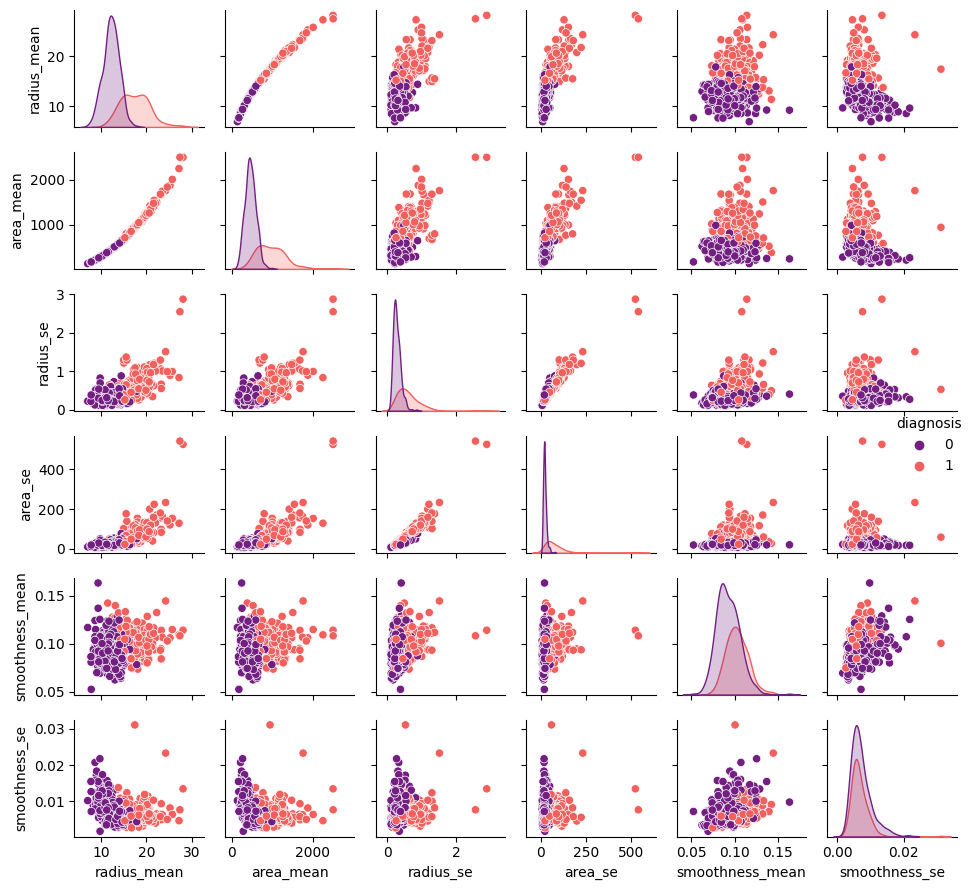

In [225]:
#make pairplot
sns.pairplot(data2,hue='diagnosis',palette='magma',height=1.5)
plt.tight_layout()

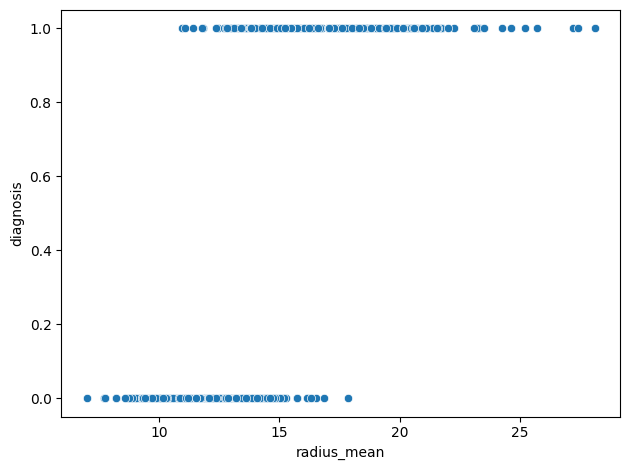

In [226]:
#scatterplot
sns.scatterplot(x='radius_mean',y='diagnosis',data=data2)
plt.tight_layout()

## Apply Model Logistic Regression

In [227]:
X = data2.drop('diagnosis', axis=1)
y = data2['diagnosis']

In [228]:
#cek data X
X

,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se
0,17.99,1001.0,1.0950,153.40,0.11840,0.006399
1,20.57,1326.0,0.5435,74.08,0.08474,0.005225
2,19.69,1203.0,0.7456,94.03,0.10960,0.006150
3,11.42,386.1,0.4956,27.23,0.14250,0.009110
4,20.29,1297.0,0.7572,94.44,0.10030,0.011490
...,...,...,...,...,...,...
564,21.56,1479.0,1.1760,158.70,0.11100,0.010300
565,20.13,1261.0,0.7655,99.04,0.09780,0.005769
566,16.60,858.1,0.4564,48.55,0.08455,0.005903
567,20.60,1265.0,0.7260,86.22,0.11780,0.006522


In [229]:
#cek data y
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [230]:
#Bagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [231]:
X_train

,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se
68,9.029,250.5,0.3274,17.67,0.10660,0.009549
181,21.090,1311.0,0.6298,81.46,0.11410,0.004253
63,9.173,260.9,0.4098,23.52,0.07721,0.008738
248,10.650,347.0,0.2497,16.64,0.09657,0.007189
60,10.170,311.9,0.5158,34.62,0.11340,0.007514
...,...,...,...,...,...,...
71,8.888,244.0,0.5262,25.44,0.09783,0.017210
106,11.640,412.5,0.3060,20.62,0.11420,0.008540
270,14.290,632.6,0.1302,10.77,0.06429,0.003492
435,13.980,599.5,0.2208,18.85,0.10600,0.005314


In [232]:
y_train

68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int64

In [233]:
X_train.shape

(455, 6)

In [234]:
y_train.shape

(455,)

In [235]:
X_test

,radius_mean,area_mean,radius_se,area_se,smoothness_mean,smoothness_se
204,12.47,481.9,0.3961,30.29,0.09965,0.006953
70,18.94,1130.0,0.7888,96.05,0.09009,0.004444
131,15.46,748.9,0.4743,48.31,0.10920,0.006240
431,12.40,467.8,0.1767,15.43,0.10540,0.010000
540,11.54,402.9,0.2784,20.86,0.09984,0.012150
...,...,...,...,...,...,...
486,14.64,666.0,0.2204,19.98,0.08641,0.003535
75,16.07,817.7,0.7474,79.25,0.09168,0.010820
249,11.52,406.3,0.2562,18.62,0.10130,0.006662
238,14.22,623.9,0.3354,29.96,0.08223,0.006307


## Training

In [236]:
#Inisialisasi dan Training Model Logistic Regression
Logisreg_model = LogisticRegression()
Logisreg_model.fit(X_train, y_train)

LogisticRegression()

In [237]:
#Prediksi model yang telah di training
logisreg_pred = Logisreg_model.predict(X_test)

In [238]:
#Evaluasi Model
print(accuracy_score(y_test, logisreg_pred))
print(confusion_matrix(y_test, logisreg_pred))
print(classification_report(y_test, logisreg_pred))

0.956140350877193
[[70  1]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Save Model

In [239]:
#ekspor model
import pickle

pickle.dump(Logisreg_model,open('log_regression.pkl','wb'))

## Menjalankan Streamlit melalui google colab

In [240]:
!pip install -q streamlit
!pip install ydata-Profiling
!pip install streamlit_pandas_profiling

In [242]:
!streamlit run app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.106.69.107


In [251]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session f47115991a1702e


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.69.107:8501

npx: installed 22 in 2.901s
your url is: https://six-ravens-invent.loca.lt
  Stopping...
^C
